# Skalowanie obrazów
### Skalowanie bitmapy 512x512 pikseli poprzez operacje interpolacji na wierszach i kolumnach

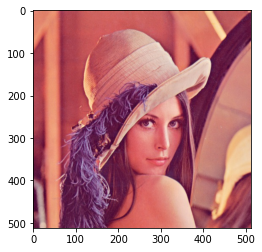

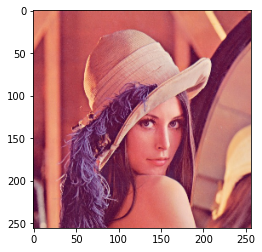

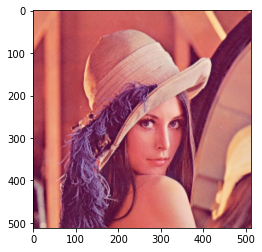

In [66]:
import numpy as np
import matplotlib.pyplot as plt

SCALE_FACTOR = 2

def resize_image(image, scale_factor):
    height, width = image.shape[:2] # Pobierz wymiary obrazu

    # Oblicz nowe wymiary obrazu
    new_height = int(height * scale_factor)
    new_width = int(width * scale_factor)

    # Utwórz nową macierz dla przeskalowanego obrazu
    result = np.zeros((new_height, new_width, 4), dtype=np.uint8)

    # Oblicz współczynniki skalowania
    scale_y = height / new_height
    scale_x = width / new_width

    # Iteruj przez piksele w nowym obrazie
    for y in range(new_height):
        for x in range(new_width):
            # Oblicz współrzędne piksela w oryginalnym obrazie
            src_y = int(y * scale_y)
            src_x = int(x * scale_x)
        
            result[y, x] = image[src_y, src_x] # Przypisz przeskalowany piksel

    return result


image = plt.imread("img/lena.bmp")

# Zmniejszenie i następnie zwiększenie obrazu
result_scaled_down = resize_image(image, 1/SCALE_FACTOR)
result_scaled_up = resize_image(result_scaled_down, SCALE_FACTOR)

plt.imshow(image) # oryginalny obraz
plt.show()

plt.imshow(result_scaled_down)
plt.show()

plt.imshow(result_scaled_up)
plt.show()
plt.imsave("img/lena_wez_rutinoscorbin.bmp", result_scaled_up)


### Porównanie obrazów: miara MSE (Mean Squared Error) i MAE (Mean Absolute Error)

In [67]:
from PIL import Image
import numpy as np

def calculate_mse(image1, image2):
    mse = np.mean((image1 - image2) ** 2)
    return mse

def calculate_mae(image1, image2):
    mae = np.mean(np.abs(image1 - image2))
    return mae

# Wczytaj oba obrazy z pliku BMP
image1 = Image.open("img/lena.bmp").convert('RGB')
image2 = Image.open("img/lena_wez_rutinoscorbin.bmp").convert('RGB')

# Konwertuj obrazy na macierze NumPy
image1_array = np.array(image1)
image2_array = np.array(image2)

width1, height1 = image1.size
width2, height2 = image2.size
# Sprawdź, czy oba obrazy mają ten sam rozmiar
if image1_array.shape != image2_array.shape:
    print("Obrazy mają różne rozmiary: ", width1, height1, ", ", width2, height2)
else:
    # Oblicz MSE
    mse_value = calculate_mse(image1_array, image2_array)
    mae_value = calculate_mae(image1_array, image2_array)
    print("MSE: ", mse_value)
    print("MAE: ", mae_value)


MSE:  24.58860143025716
MAE:  84.58690007527669


Po dokonaniu operacji zmniejszenia a następnie powiększenia obrazu do oryginalnych wymiarów, zauważalnie spada jego jakość. Im większy współczynnik skalowania, tym bardziej obraz wyjściowy staje się rozpikselowany. 
Subiektywne odczucia potwierdzają miary MSE i MAE. MSE mierzy średnią kwadratową różnicę między wartościami pikseli dwóch obrazów, natomiast MAE mierzy średni błąd bezwzględny. Im większy dobrany współczynnik skalowania, tym większa wartość MSE i MAE.

Jeśli obraz zostaje najpierw powiększony a następnie pomniejszony do początkowych wymiarów to nie jest zauważalna utrata jakości obrazu, a MSE i MAE są równe 0.